In [219]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [549]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [516]:
from collections import Counter
%matplotlib inline 
import seaborn as sns
sns.set_style('ticks')
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm
from scipy import stats


from sklearn.metrics import confusion_matrix
import xgboost as xgb
from xgboost import plot_importance

import warnings
warnings.filterwarnings('ignore')

/Users/chrisfiorentine/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/chrisfiorentine/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/chrisfiorentine/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.base module

In [1128]:
df = pd.read_csv('file:///Users/chrisfiorentine/Downloads/game_logs.csv')

In [1129]:
df = pd.DataFrame(df)

In [1130]:
df

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_line_score,h_line_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,hp_umpire_id,hp_umpire_name,1b_umpire_id,1b_umpire_name,2b_umpire_id,2b_umpire_name,3b_umpire_id,3b_umpire_name,lf_umpire_id,lf_umpire_name,rf_umpire_id,rf_umpire_name,v_manager_id,v_manager_name,h_manager_id,h_manager_name,winning_pitcher_id,winning_pitcher_name,losing_pitcher_id,losing_pitcher_name,saving_pitcher_id,saving_pitcher_name,winning_rbi_batter_id,winning_rbi_batter_id_name,v_starting_pitcher_id,v_starting_pitcher_name,h_starting_pitcher_id,h_starting_pitcher_name,v_player_1_id,v_player_1_name,v_player_1_def_pos,v_player_2_id,v_player_2_name,v_player_2_def_pos,v_player_3_id,v_player_3_name,v_player_3_def_pos,v_player_4_id,v_player_4_name,v_player_4_def_pos,v_player_5_id,v_player_5_name,v_player_5_def_pos,v_player_6_id,v_player_6_name,v_player_6_def_pos,v_player_7_id,v_player_7_name,v_player_7_def_pos,v_player_8_id,v_player_8_name,v_player_8_def_pos,v_player_9_id,v_player_9_name,v_player_9_def_pos,h_player_1_id,h_player_1_name,h_player_1_def_pos,h_player_2_id,h_player_2_name,h_player_2_def_pos,h_player_3_id,h_player_3_name,h_player_3_def_pos,h_player_4_id,h_player_4_name,h_player_4_def_pos,h_player_5_id,h_player_5_name,h_player_5_def_pos,h_player_6_id,h_player_6_name,h_player_6_def_pos,h_player_7_id,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,18710504,0,Thu,CL1,na,1,FW1,na,1,0,2,54.0,D,NaN,NaN,NaN,FOR01,200.0,120.0,000000000,010010000,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,6.0,1.0,-1.0,-1.0,-1.0,4.0,1.0,1.0,1.0,0.0,0.0,27.0,9.0,0.0,3.0,0.0,0.0,31.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,3.0,1.0,0.0,0.0,0.0,0.0,27.0,3.0,3.0,1.0,1.0,0.0,boakj901,John Boake,NaN,(none),NaN,(none),NaN,(none),NaN,(none),NaN,(none),paboc101,Charlie Pabor,lennb101,Bill Lennon,mathb101,Bobby Mathews,prata101,Al Pratt,NaN,(none),NaN,(none),prata101,Al Pratt,mathb101,Bobby Mathews,whitd102,Deacon White,2.0,kimbg101,Gene Kimball,4.0,paboc101,Charlie Pabor,7.0,allia101,Art Allison,8.0,white104,Elmer White,9.0,prata101,Al Pratt,1.0,sutte101,Ezra Sutton,5.0,carlj102,Jim Carleton,3.0,bassj101,John Bass,6.0,selmf101,Frank Sellman,5.0,mathb101,Bobby Mathews,1.0,foraj101,Jim Foran,3.0,goldw101,Wally Goldsmith,6.0,lennb101,Bill Lennon,2.0,caret101,Tom Carey,4.0,mince101,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,18710505,0,Fri,BS1,na,1,WS3,na,1,20,18,54.0,D,NaN,NaN,NaN,WAS01,5000.0,145.0,107000435,640113030,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0,0.0,18.0,-1.0,5.0,3.0,-1.0,-1.0,-1.0,12.0,1.0,6.0,6.0,1.0,0.0,27.0,13.0,10.0,1.0,2.0,0.0,49.0,14.0,2.0,0.0,0.0,11.0,0.0,0.0,0.0,10.0,-1.0,2.0,1.0,-1.0,-1.0,-1.0,14.0,1.0,7.0,7.0,0.0,0.0,27.0,20.0,10.0,2.0,3.0,0.0,dobsh901,Henry Dobson,NaN,(none),NaN,(none),NaN,(none),NaN,(none),NaN,(none),wrigh101,Harry Wright,younn801,Nick Young,spala101,Al Spalding,braia102,Asa Brainard,NaN,(none),NaN,(none),spala101,Al Spalding,braia102,Asa

In [1131]:
df.drop(columns = ['v_line_score','h_line_score','1b_umpire_id', '1b_umpire_name','2b_umpire_id','2b_umpire_name','3b_umpire_id','3b_umpire_name','lf_umpire_id','lf_umpire_name','rf_umpire_id','rf_umpire_name','winning_rbi_batter_id','winning_rbi_batter_id_name','winning_pitcher_id','winning_pitcher_name','losing_pitcher_id','losing_pitcher_name','saving_pitcher_id','saving_pitcher_name','additional_info','acquisition_info'], inplace = True)







In [1132]:
df = df[df['date']>20120000]

In [1133]:
df

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,hp_umpire_id,hp_umpire_name,v_manager_id,v_manager_name,h_manager_id,h_manager_name,v_starting_pitcher_id,v_starting_pitcher_name,h_starting_pitcher_id,h_starting_pitcher_name,v_player_1_id,v_player_1_name,v_player_1_def_pos,v_player_2_id,v_player_2_name,v_player_2_def_pos,v_player_3_id,v_player_3_name,v_player_3_def_pos,v_player_4_id,v_player_4_name,v_player_4_def_pos,v_player_5_id,v_player_5_name,v_player_5_def_pos,v_player_6_id,v_player_6_name,v_player_6_def_pos,v_player_7_id,v_player_7_name,v_player_7_def_pos,v_player_8_id,v_player_8_name,v_player_8_def_pos,v_player_9_id,v_player_9_name,v_player_9_def_pos,h_player_1_id,h_player_1_name,h_player_1_def_pos,h_player_2_id,h_player_2_name,h_player_2_def_pos,h_player_3_id,h_player_3_name,h_player_3_def_pos,h_player_4_id,h_player_4_name,h_player_4_def_pos,h_player_5_id,h_player_5_name,h_player_5_def_pos,h_player_6_id,h_player_6_name,h_player_6_def_pos,h_player_7_id,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos
159759,20120328,0,Wed,SEA,AL,1,OAK,AL,1,3,1,66.0,N,NaN,NaN,NaN,TOK01,44227.0,184.0,39.0,9.0,1.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,1.0,0.0,4.0,3.0,1.0,1.0,0.0,0.0,33.0,7.0,1.0,0.0,0.0,0.0,39.0,6.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,10.0,2.0,1.0,0.0,0.0,7.0,6.0,3.0,3.0,0.0,0.0,33.0,19.0,1.0,0.0,1.0,0.0,hallt901,Tom Hallion,wedge001,Eric Wedge,melvb001,Bob Melvin,hernf002,Felix Hernandez,mccab001,Brandon McCarthy,figgc001,Chone Figgins,5.0,ackld001,Dustin Ackley,4.0,suzui001,Ichiro Suzuki,9.0,smoaj001,Justin Smoak,3.0,montj003,Jesus Montero,10.0,carpm001,Mike Carp,7.0,olivm001,Miguel Olivo,2.0,saunm001,Michael Saunders,8.0,ryanb002,Brendan Ryan,6.0,weekj001,Jemile Weeks,4.0,pennc001,Cliff Pennington,6.0,crisc001,Coco Crisp,7.0,smits002,Seth Smith,10.0,suzuk001,Kurt Suzuki,2.0,reddj001,Josh Reddick,9.0,cespy001,Yoenis Cespedes,8.0,alleb001,Brandon Allen,3.0,sogae001,Eric Sogard,5.0
159760,20120329,0,Thu,SEA,AL,2,OAK,AL,2,1,4,51.0,N,NaN,NaN,NaN,TOK01,43391.0,143.0,30.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,3.0,4.0,4.0,4.0,0.0,0.0,24.0,7.0,0.0,0.0,0.0,0.0,30.0,7.0,1.0,0.0,3.0,4.0,0.0,0.0,0.0,2.0,0.0,5.0,0.0,1.0,0.0,0.0,4.0,2.0,1.0,1.0,0.0,0.0,27.0,9.0,0.0,0.0,0.0,0.0,nelsj901,Jeff Nelson,wedge001,Eric Wedge,melvb001,Bob Melvin,vargj001,Jason Vargas,colob001,Bartolo Colon,figgc001,Chone Figgins,7.0,ackld001,Dustin Ackley,4.0,suzui001,Ichiro Suzuki,9.0,smoaj001,Justin Smoak,3.0,montj003,Jesus Montero,10.0,seagk001,Kyle Seager,5.0,olivm001,Miguel Olivo,2.0,saunm001,Michael Saunders,8.0,ryanb002,Brendan Ryan,6.0,weekj001,Jemile Weeks,4.0,pennc001,Cliff Pennington,6.0,crisc001,Coco Crisp,7.0,gomej001,Jonny Gomes,10.0,suzuk001,Kurt Suzuki,2.0,cespy001,Yoenis Cespedes,8.0,reddj001,Josh Reddick,9.0,donaj001,Josh Donaldson,5.0,kaaik001,Kila Ka'aihue,3.0
159761,20120404,0,Wed,SLN,NL,1,MIA,NL,1,4,1,54.0,N,NaN,NaN,NaN,MIA02,36601.0,162.0,37.0,13.0,3.0,0.0,0.0,4.0,1.0,0.0,0.0,3.0,2.0,5.0,1.0,1.0,0.

In [1134]:
df.columns

Index(['date', 'number_of_game', 'day_of_week', 'v_name', 'v_league',
       'v_game_number', 'h_name', 'h_league', 'h_game_number', 'v_score',
       ...
       'h_player_6_def_pos', 'h_player_7_id', 'h_player_7_name',
       'h_player_7_def_pos', 'h_player_8_id', 'h_player_8_name',
       'h_player_8_def_pos', 'h_player_9_id', 'h_player_9_name',
       'h_player_9_def_pos'],
      dtype='object', length=139)

In [1135]:
player_cols =['v_starting_pitcher_id','v_starting_pitcher_name','v_player_1_id','v_player_1_name',
                     'v_player_1_def_pos','v_player_2_id','v_player_3_id','v_player_4_id','v_player_5_id',
                     'v_player_6_id','v_player_7_id','v_player_8_id','v_player_9_id','v_player_2_name',
                     'v_player_3_name','v_player_4_name','v_player_5_name','v_player_6_name','v_player_7_name',
                     'v_player_8_name','v_player_9_name','v_player_2_def_pos','v_player_3_def_pos',
                     'v_player_4_def_pos','v_player_5_def_pos','v_player_6_def_pos','v_player_7_def_pos',
                     'v_player_8_def_pos','v_player_9_def_pos','h_player_2_def_pos', 'h_player_3_id', 'h_player_3_name',
       'h_player_3_def_pos', 'h_player_4_id', 'h_player_4_name',
       'h_player_4_def_pos', 'h_player_5_id', 'h_player_5_name',
       'h_player_5_def_pos', 'h_player_6_id', 'h_player_6_name',
       'h_player_6_def_pos', 'h_player_7_id', 'h_player_7_name',
       'h_player_7_def_pos', 'h_player_8_id', 'h_player_8_name',
       'h_player_8_def_pos', 'h_player_9_id', 'h_player_9_name',
       'h_player_9_def_pos','hp_umpire_id', 'hp_umpire_name',
       'h_manager_id', 'h_manager_name', 'h_starting_pitcher_id',
       'h_starting_pitcher_name', 'h_player_1_id', 'h_player_1_name','v_manager_id', 'v_manager_name',
       'h_player_1_def_pos', 'h_player_2_id', 'h_player_2_name']

In [1136]:
df_no_players = df.drop(columns = player_cols)

In [1137]:
df_no_players_vis = df_no_players.copy()

In [1138]:
df_no_players.columns

Index(['date', 'number_of_game', 'day_of_week', 'v_name', 'v_league',
       'v_game_number', 'h_name', 'h_league', 'h_game_number', 'v_score',
       'h_score', 'length_outs', 'day_night', 'completion', 'forefeit',
       'protest', 'park_id', 'attendance', 'length_minutes', 'v_at_bats',
       'v_hits', 'v_doubles', 'v_triples', 'v_homeruns', 'v_rbi',
       'v_sacrifice_hits', 'v_sacrifice_flies', 'v_hit_by_pitch', 'v_walks',
       'v_intentional walks', 'v_strikeouts', 'v_stolen_bases',
       'v_caught_stealing', 'v_grounded_into_double',
       'v_first_catcher_interference', 'v_left_on_base', 'v_pitchers_used',
       'v_individual_earned_runs', 'v_team_earned_runs', 'v_wild_pitches',
       'v_balks', 'v_putouts', 'v_assists', 'v_errors', 'v_passed_balls',
       'v_double_plays', 'v_triple_plays', 'h_at_bats', 'h_hits', 'h_doubles',
       'h_triples', 'h_homeruns', 'h_rbi', 'h_sacrifice_hits',
       'h_sacrifice_flies', 'h_hit_by_pitch', 'h_walks', 'h_intentional walks',
  

In [1139]:
df_no_players['Run_dif'] = df_no_players['h_score'] - df_no_players['v_score']

In [1140]:
df_no_players_vis['Run_dif'] = df_no_players['v_score'] - df_no_players['h_score']

In [1141]:
df_no_players

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,Run_dif
159759,20120328,0,Wed,SEA,AL,1,OAK,AL,1,3,1,66.0,N,NaN,NaN,NaN,TOK01,44227.0,184.0,39.0,9.0,1.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,1.0,0.0,4.0,3.0,1.0,1.0,0.0,0.0,33.0,7.0,1.0,0.0,0.0,0.0,39.0,6.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,10.0,2.0,1.0,0.0,0.0,7.0,6.0,3.0,3.0,0.0,0.0,33.0,19.0,1.0,0.0,1.0,0.0,-2
159760,20120329,0,Thu,SEA,AL,2,OAK,AL,2,1,4,51.0,N,NaN,NaN,NaN,TOK01,43391.0,143.0,30.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,3.0,4.0,4.0,4.0,0.0,0.0,24.0,7.0,0.0,0.0,0.0,0.0,30.0,7.0,1.0,0.0,3.0,4.0,0.0,0.0,0.0,2.0,0.0,5.0,0.0,1.0,0.0,0.0,4.0,2.0,1.0,1.0,0.0,0.0,27.0,9.0,0.0,0.0,0.0,0.0,3
159761,20120404,0,Wed,SLN,NL,1,MIA,NL,1,4,1,54.0,N,NaN,NaN,NaN,MIA02,36601.0,162.0,37.0,13.0,3.0,0.0,0.0,4.0,1.0,0.0,0.0,3.0,2.0,5.0,1.0,1.0,0.0,0.0,10.0,4.0,1.0,1.0,0.0,0.0,27.0,10.0,0.0,0.0,1.0,0.0,30.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,3.0,5.0,4.0,4.0,0.0,0.0,27.0,12.0,0.0,0.0,2.0,0.0,-3
159762,20120405,0,Thu,TOR,AL,1,CLE,AL,1,7,4,96.0,D,NaN,NaN,NaN,CLE08,43190.0,314.0,56.0,10.0,3.0,0.0,2.0,7.0,0.0,1.0,1.0,7.0,1.0,16.0,0.0,0.0,3.0,0.0,10.0,8.0,4.0,4.0,0.0,0.0,48.0,20.0,1.0,0.0,3.0,0.0,49.0,7.0,2.0,0.0,1.0,4.0,1.0,0.0,1.0,11.0,0.0,12.0,0.0,1.0,3.0,0.0,10.0,6.0,7.0,7.0,1.0,0.0,48.0,22.0,0.0,0.0,3.0,0.0,-3
159763,20120405,0,Thu,BOS,AL,1,DET,AL,1,2,3,52.0,D,NaN,NaN,NaN,DET05,45027.0,187.0,32.0,5.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,8.0,1.0,0.0,0.0,0.0,5.0,5.0,3.0,3.0,0.0,0.0,25.0,7.0,0.0,0.0,3.0,0.0,31.0,10.0,2.0,1.0,0.0,3.0,0.0,1.0,1.0,4.0,1.0,4.0,0.0,0.0,3.0,0.0,9.0,2.0,2.0,2.0,0.0,0.0,27.0,6.0,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171902,20161002,0,Sun,MIL,NL,162,COL,NL,162,6,4,60.0,D,NaN,NaN,NaN,DEN02,27762.0,203.0,39.0,10.0,4.0,1.0,2.0,6.0,0.0,0.0,1.0,4.0,0.0,12.0,2.0,1.0,0.0,0.0,8.0,7.0,4.0,4.0,1.0,0.0,30.0,12.0,1.0,0.0,0.0,0.0,41.0,13.0,4.0,0.0,1.0,4.0,1.0,0.0,1.0,3.0,0.0,11.0,0.0,1.0,0.0,0.0,12.0,5.0,6.0,6.0,0.0,0.0,30.0,13.0,0.0,0.0,0.0,0.0,-2
171903,20161002,0,Sun,NYN,NL,162,PHI,NL,162,2,5,51.0,D,NaN,NaN,NaN,PHI13,36935.0,159.0,33.0,8.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,9.0,1.0,1.0,1.0,0.0,6.0,6.0,3.0,3.0,0.0,0.0,24.0,12.0,3.0,1.0,2.0,0.0,33.0,10.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,2.0,0.0,7.0,5.0,2.0,2.0,0.0,0.0,27.0,7.0,0.0,0.0,1.0,0.0,3
171904,20161002,0,Sun,LAN,NL,162,SFN,NL,162,1,7,51.0,D,NaN,NaN,NaN,SFO03,41445.0,184.0,30.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,1.0,0.0,4.0,7.0,7.0,7.0,0.0,0.0,24.0,5.0,1.0,0.0,0.0,0.0,39.0,16.0,3.0,1.0,0.0,7.0,0.0,0.0,0.0,4.0,1.0,11.0,2.0,1.0,0.0,0.0,12.0,2.0,1.0,1.0,0.0,0.0,27.0,7.0,0.0,0.0,1.0,0.0,6
171905,20161002,0,Sun,PIT,NL,162,SLN,NL,162,4,10,51.0,D,NaN,NaN,NaN,STL10,44615.0,192.0,35.0,9.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,4.0,0.0,11.0,0.

In [1142]:
df_no_players_vis

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,Run_dif
159759,20120328,0,Wed,SEA,AL,1,OAK,AL,1,3,1,66.0,N,NaN,NaN,NaN,TOK01,44227.0,184.0,39.0,9.0,1.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,1.0,0.0,4.0,3.0,1.0,1.0,0.0,0.0,33.0,7.0,1.0,0.0,0.0,0.0,39.0,6.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,10.0,2.0,1.0,0.0,0.0,7.0,6.0,3.0,3.0,0.0,0.0,33.0,19.0,1.0,0.0,1.0,0.0,2
159760,20120329,0,Thu,SEA,AL,2,OAK,AL,2,1,4,51.0,N,NaN,NaN,NaN,TOK01,43391.0,143.0,30.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,3.0,4.0,4.0,4.0,0.0,0.0,24.0,7.0,0.0,0.0,0.0,0.0,30.0,7.0,1.0,0.0,3.0,4.0,0.0,0.0,0.0,2.0,0.0,5.0,0.0,1.0,0.0,0.0,4.0,2.0,1.0,1.0,0.0,0.0,27.0,9.0,0.0,0.0,0.0,0.0,-3
159761,20120404,0,Wed,SLN,NL,1,MIA,NL,1,4,1,54.0,N,NaN,NaN,NaN,MIA02,36601.0,162.0,37.0,13.0,3.0,0.0,0.0,4.0,1.0,0.0,0.0,3.0,2.0,5.0,1.0,1.0,0.0,0.0,10.0,4.0,1.0,1.0,0.0,0.0,27.0,10.0,0.0,0.0,1.0,0.0,30.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,3.0,5.0,4.0,4.0,0.0,0.0,27.0,12.0,0.0,0.0,2.0,0.0,3
159762,20120405,0,Thu,TOR,AL,1,CLE,AL,1,7,4,96.0,D,NaN,NaN,NaN,CLE08,43190.0,314.0,56.0,10.0,3.0,0.0,2.0,7.0,0.0,1.0,1.0,7.0,1.0,16.0,0.0,0.0,3.0,0.0,10.0,8.0,4.0,4.0,0.0,0.0,48.0,20.0,1.0,0.0,3.0,0.0,49.0,7.0,2.0,0.0,1.0,4.0,1.0,0.0,1.0,11.0,0.0,12.0,0.0,1.0,3.0,0.0,10.0,6.0,7.0,7.0,1.0,0.0,48.0,22.0,0.0,0.0,3.0,0.0,3
159763,20120405,0,Thu,BOS,AL,1,DET,AL,1,2,3,52.0,D,NaN,NaN,NaN,DET05,45027.0,187.0,32.0,5.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,8.0,1.0,0.0,0.0,0.0,5.0,5.0,3.0,3.0,0.0,0.0,25.0,7.0,0.0,0.0,3.0,0.0,31.0,10.0,2.0,1.0,0.0,3.0,0.0,1.0,1.0,4.0,1.0,4.0,0.0,0.0,3.0,0.0,9.0,2.0,2.0,2.0,0.0,0.0,27.0,6.0,1.0,0.0,0.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171902,20161002,0,Sun,MIL,NL,162,COL,NL,162,6,4,60.0,D,NaN,NaN,NaN,DEN02,27762.0,203.0,39.0,10.0,4.0,1.0,2.0,6.0,0.0,0.0,1.0,4.0,0.0,12.0,2.0,1.0,0.0,0.0,8.0,7.0,4.0,4.0,1.0,0.0,30.0,12.0,1.0,0.0,0.0,0.0,41.0,13.0,4.0,0.0,1.0,4.0,1.0,0.0,1.0,3.0,0.0,11.0,0.0,1.0,0.0,0.0,12.0,5.0,6.0,6.0,0.0,0.0,30.0,13.0,0.0,0.0,0.0,0.0,2
171903,20161002,0,Sun,NYN,NL,162,PHI,NL,162,2,5,51.0,D,NaN,NaN,NaN,PHI13,36935.0,159.0,33.0,8.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,9.0,1.0,1.0,1.0,0.0,6.0,6.0,3.0,3.0,0.0,0.0,24.0,12.0,3.0,1.0,2.0,0.0,33.0,10.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,2.0,0.0,7.0,5.0,2.0,2.0,0.0,0.0,27.0,7.0,0.0,0.0,1.0,0.0,-3
171904,20161002,0,Sun,LAN,NL,162,SFN,NL,162,1,7,51.0,D,NaN,NaN,NaN,SFO03,41445.0,184.0,30.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,1.0,0.0,4.0,7.0,7.0,7.0,0.0,0.0,24.0,5.0,1.0,0.0,0.0,0.0,39.0,16.0,3.0,1.0,0.0,7.0,0.0,0.0,0.0,4.0,1.0,11.0,2.0,1.0,0.0,0.0,12.0,2.0,1.0,1.0,0.0,0.0,27.0,7.0,0.0,0.0,1.0,0.0,-6
171905,20161002,0,Sun,PIT,NL,162,SLN,NL,162,4,10,51.0,D,NaN,NaN,NaN,STL10,44615.0,192.0,35.0,9.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,4.0,0.0,11.0,0.

In [1143]:
def wins(rd):
    if rd > 0:
        return 1
    if rd < 0:
        return 0

In [1144]:
def losses(rd):
    if rd < 0:
        return 1
    if rd > 0:
        return 0

In [1145]:
df_no_players['Win'] = df_no_players['Run_dif'].apply(wins)

In [1146]:
df_no_players['Lose'] = df_no_players['Run_dif'].apply(losses)

In [1147]:
df_no_players_vis['Win'] = df_no_players_vis['Run_dif'].apply(wins)

In [1148]:
df_no_players_vis['Lose'] = df_no_players_vis['Run_dif'].apply(losses)

In [1149]:
df_no_players

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,Run_dif,Win,Lose
159759,20120328,0,Wed,SEA,AL,1,OAK,AL,1,3,1,66.0,N,NaN,NaN,NaN,TOK01,44227.0,184.0,39.0,9.0,1.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,1.0,0.0,4.0,3.0,1.0,1.0,0.0,0.0,33.0,7.0,1.0,0.0,0.0,0.0,39.0,6.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,10.0,2.0,1.0,0.0,0.0,7.0,6.0,3.0,3.0,0.0,0.0,33.0,19.0,1.0,0.0,1.0,0.0,-2,0.0,1.0
159760,20120329,0,Thu,SEA,AL,2,OAK,AL,2,1,4,51.0,N,NaN,NaN,NaN,TOK01,43391.0,143.0,30.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,3.0,4.0,4.0,4.0,0.0,0.0,24.0,7.0,0.0,0.0,0.0,0.0,30.0,7.0,1.0,0.0,3.0,4.0,0.0,0.0,0.0,2.0,0.0,5.0,0.0,1.0,0.0,0.0,4.0,2.0,1.0,1.0,0.0,0.0,27.0,9.0,0.0,0.0,0.0,0.0,3,1.0,0.0
159761,20120404,0,Wed,SLN,NL,1,MIA,NL,1,4,1,54.0,N,NaN,NaN,NaN,MIA02,36601.0,162.0,37.0,13.0,3.0,0.0,0.0,4.0,1.0,0.0,0.0,3.0,2.0,5.0,1.0,1.0,0.0,0.0,10.0,4.0,1.0,1.0,0.0,0.0,27.0,10.0,0.0,0.0,1.0,0.0,30.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,3.0,5.0,4.0,4.0,0.0,0.0,27.0,12.0,0.0,0.0,2.0,0.0,-3,0.0,1.0
159762,20120405,0,Thu,TOR,AL,1,CLE,AL,1,7,4,96.0,D,NaN,NaN,NaN,CLE08,43190.0,314.0,56.0,10.0,3.0,0.0,2.0,7.0,0.0,1.0,1.0,7.0,1.0,16.0,0.0,0.0,3.0,0.0,10.0,8.0,4.0,4.0,0.0,0.0,48.0,20.0,1.0,0.0,3.0,0.0,49.0,7.0,2.0,0.0,1.0,4.0,1.0,0.0,1.0,11.0,0.0,12.0,0.0,1.0,3.0,0.0,10.0,6.0,7.0,7.0,1.0,0.0,48.0,22.0,0.0,0.0,3.0,0.0,-3,0.0,1.0
159763,20120405,0,Thu,BOS,AL,1,DET,AL,1,2,3,52.0,D,NaN,NaN,NaN,DET05,45027.0,187.0,32.0,5.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,8.0,1.0,0.0,0.0,0.0,5.0,5.0,3.0,3.0,0.0,0.0,25.0,7.0,0.0,0.0,3.0,0.0,31.0,10.0,2.0,1.0,0.0,3.0,0.0,1.0,1.0,4.0,1.0,4.0,0.0,0.0,3.0,0.0,9.0,2.0,2.0,2.0,0.0,0.0,27.0,6.0,1.0,0.0,0.0,0.0,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171902,20161002,0,Sun,MIL,NL,162,COL,NL,162,6,4,60.0,D,NaN,NaN,NaN,DEN02,27762.0,203.0,39.0,10.0,4.0,1.0,2.0,6.0,0.0,0.0,1.0,4.0,0.0,12.0,2.0,1.0,0.0,0.0,8.0,7.0,4.0,4.0,1.0,0.0,30.0,12.0,1.0,0.0,0.0,0.0,41.0,13.0,4.0,0.0,1.0,4.0,1.0,0.0,1.0,3.0,0.0,11.0,0.0,1.0,0.0,0.0,12.0,5.0,6.0,6.0,0.0,0.0,30.0,13.0,0.0,0.0,0.0,0.0,-2,0.0,1.0
171903,20161002,0,Sun,NYN,NL,162,PHI,NL,162,2,5,51.0,D,NaN,NaN,NaN,PHI13,36935.0,159.0,33.0,8.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,9.0,1.0,1.0,1.0,0.0,6.0,6.0,3.0,3.0,0.0,0.0,24.0,12.0,3.0,1.0,2.0,0.0,33.0,10.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,2.0,0.0,7.0,5.0,2.0,2.0,0.0,0.0,27.0,7.0,0.0,0.0,1.0,0.0,3,1.0,0.0
171904,20161002,0,Sun,LAN,NL,162,SFN,NL,162,1,7,51.0,D,NaN,NaN,NaN,SFO03,41445.0,184.0,30.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,1.0,0.0,4.0,7.0,7.0,7.0,0.0,0.0,24.0,5.0,1.0,0.0,0.0,0.0,39.0,16.0,3.0,1.0,0.0,7.0,0.0,0.0,0.0,4.0,1.0,11.0,2.0,1.0,0.0,0.0,12.0,2.0,1.0,1.0,0.0,0.0,27.0,7.0,0.0,0.0,1.0,0.0,6,1.0,0.0
171905,20161002,0,Sun,PIT,NL,162,SLN,NL,162,4,10,51.0,D,NaN

In [1150]:
df_no_players_vis

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,Run_dif,Win,Lose
159759,20120328,0,Wed,SEA,AL,1,OAK,AL,1,3,1,66.0,N,NaN,NaN,NaN,TOK01,44227.0,184.0,39.0,9.0,1.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,1.0,0.0,4.0,3.0,1.0,1.0,0.0,0.0,33.0,7.0,1.0,0.0,0.0,0.0,39.0,6.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,10.0,2.0,1.0,0.0,0.0,7.0,6.0,3.0,3.0,0.0,0.0,33.0,19.0,1.0,0.0,1.0,0.0,2,1.0,0.0
159760,20120329,0,Thu,SEA,AL,2,OAK,AL,2,1,4,51.0,N,NaN,NaN,NaN,TOK01,43391.0,143.0,30.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,3.0,4.0,4.0,4.0,0.0,0.0,24.0,7.0,0.0,0.0,0.0,0.0,30.0,7.0,1.0,0.0,3.0,4.0,0.0,0.0,0.0,2.0,0.0,5.0,0.0,1.0,0.0,0.0,4.0,2.0,1.0,1.0,0.0,0.0,27.0,9.0,0.0,0.0,0.0,0.0,-3,0.0,1.0
159761,20120404,0,Wed,SLN,NL,1,MIA,NL,1,4,1,54.0,N,NaN,NaN,NaN,MIA02,36601.0,162.0,37.0,13.0,3.0,0.0,0.0,4.0,1.0,0.0,0.0,3.0,2.0,5.0,1.0,1.0,0.0,0.0,10.0,4.0,1.0,1.0,0.0,0.0,27.0,10.0,0.0,0.0,1.0,0.0,30.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,3.0,5.0,4.0,4.0,0.0,0.0,27.0,12.0,0.0,0.0,2.0,0.0,3,1.0,0.0
159762,20120405,0,Thu,TOR,AL,1,CLE,AL,1,7,4,96.0,D,NaN,NaN,NaN,CLE08,43190.0,314.0,56.0,10.0,3.0,0.0,2.0,7.0,0.0,1.0,1.0,7.0,1.0,16.0,0.0,0.0,3.0,0.0,10.0,8.0,4.0,4.0,0.0,0.0,48.0,20.0,1.0,0.0,3.0,0.0,49.0,7.0,2.0,0.0,1.0,4.0,1.0,0.0,1.0,11.0,0.0,12.0,0.0,1.0,3.0,0.0,10.0,6.0,7.0,7.0,1.0,0.0,48.0,22.0,0.0,0.0,3.0,0.0,3,1.0,0.0
159763,20120405,0,Thu,BOS,AL,1,DET,AL,1,2,3,52.0,D,NaN,NaN,NaN,DET05,45027.0,187.0,32.0,5.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,8.0,1.0,0.0,0.0,0.0,5.0,5.0,3.0,3.0,0.0,0.0,25.0,7.0,0.0,0.0,3.0,0.0,31.0,10.0,2.0,1.0,0.0,3.0,0.0,1.0,1.0,4.0,1.0,4.0,0.0,0.0,3.0,0.0,9.0,2.0,2.0,2.0,0.0,0.0,27.0,6.0,1.0,0.0,0.0,0.0,-1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171902,20161002,0,Sun,MIL,NL,162,COL,NL,162,6,4,60.0,D,NaN,NaN,NaN,DEN02,27762.0,203.0,39.0,10.0,4.0,1.0,2.0,6.0,0.0,0.0,1.0,4.0,0.0,12.0,2.0,1.0,0.0,0.0,8.0,7.0,4.0,4.0,1.0,0.0,30.0,12.0,1.0,0.0,0.0,0.0,41.0,13.0,4.0,0.0,1.0,4.0,1.0,0.0,1.0,3.0,0.0,11.0,0.0,1.0,0.0,0.0,12.0,5.0,6.0,6.0,0.0,0.0,30.0,13.0,0.0,0.0,0.0,0.0,2,1.0,0.0
171903,20161002,0,Sun,NYN,NL,162,PHI,NL,162,2,5,51.0,D,NaN,NaN,NaN,PHI13,36935.0,159.0,33.0,8.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,9.0,1.0,1.0,1.0,0.0,6.0,6.0,3.0,3.0,0.0,0.0,24.0,12.0,3.0,1.0,2.0,0.0,33.0,10.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,2.0,0.0,7.0,5.0,2.0,2.0,0.0,0.0,27.0,7.0,0.0,0.0,1.0,0.0,-3,0.0,1.0
171904,20161002,0,Sun,LAN,NL,162,SFN,NL,162,1,7,51.0,D,NaN,NaN,NaN,SFO03,41445.0,184.0,30.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,1.0,0.0,4.0,7.0,7.0,7.0,0.0,0.0,24.0,5.0,1.0,0.0,0.0,0.0,39.0,16.0,3.0,1.0,0.0,7.0,0.0,0.0,0.0,4.0,1.0,11.0,2.0,1.0,0.0,0.0,12.0,2.0,1.0,1.0,0.0,0.0,27.0,7.0,0.0,0.0,1.0,0.0,-6,0.0,1.0
171905,20161002,0,Sun,PIT,NL,162,SLN,NL,162,4,10,51.0,D,NaN

In [1151]:
corr_matrix = df_no_players.corr().abs()
corr_matrix

,date,number_of_game,v_game_number,h_game_number,v_score,h_score,length_outs,attendance,length_minutes,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,Run_dif,Win,Lose
date,1.000000,0.006915,0.011520,0.011426,0.017105,0.019674,0.007833,0.020137,0.029081,0.001181,0.003249,0.000951,0.006604,0.045838,0.018236,0.045876,0.001605,0.023289,0.005482,0.014563,0.059763,0.045523,0.022080,0.002929,0.018932,0.010349,0.044850,0.022439,0.022806,0.028960,0.003580,0.007746,0.022611,0.011573,0.014654,0.009093,0.006734,0.004872,0.006208,0.001776,0.001730,0.042693,0.020101,0.074567,0.001163,0.014681,0.000851,0.022859,0.059946,0.058205,0.004187,0.012607,0.013125,0.015536,0.056828,0.019137,0.018744,0.023737,0.003432,0.007402,0.026498,0.006904,0.015968,0.000591,0.014158,0.001351,0.000183,0.000183
number_of_game,0.006915,1.000000,0.022126,0.021797,0.003756,0.005220,0.008373,0.044624,0.000958,0.007688,0.002003,0.009467,0.001174,0.002543,0.001390,0.004080,0.006443,0.006946,0.022930,0.002535,0.010470,0.009151,0.006747,0.005680,0.010552,0.011852,0.000500,0.007136,0.007413,0.002408,0.007122,0.005633,0.010465,0.017212,0.026771,0.010685,0.003410,0.000138,0.000210,0.006323,0.006949,0.017489,0.007296,0.001540,0.000598,0.012925,0.009647,0.006641,0.009130,0.010822,0.003395,0.007108,0.005732,0.021643,0.016724,0.004343,0.004655,0.012497,0.015467,0.011104,0.013295,0.005583,0.013085,0.002263,0.007227,0.006439,0.008817,0.008817
v_game_number,0.011520,0.022126,1.000000,0.999518,0.007531,0.007822,0.008437,0.022967,0.043371,0.001024,0.003342,0.016575,0.008322,0.002922,0.008278,0.005823,0.005270,0.007450,0.022459,0.001279,0.019570,0.013861,0.020609,0.003416,0.004524,0.004594,0.102064,0.005075,0.004068,0.000201,0.006793,0.010001,0.026151,0.009788,0.013467,0.001164,0.005964,0.000204,0.011349,0.009458,0.006695,0.003294,0.006755,0.005561,0.014834,0.012281,0.012088,0.001525,0.018990,0.010151,0.001830,0.002068,0.019197,0.005694,0.096808,0.003185,0.003398,0.022472,0.002381,0.005975,0.038014,0.005907,0.001699,0.005588,0.007610,0.011044,0.012106,0.012106
h_game_number,0.011426,0.021797,0.999518,1.000000,0.007790,0.007012,0.007988,0.022637,0.043274,0.001175,0.002984,0.016431,0.008376,0.002675,0.008482,0.006169,0.004904,0.007523,0.022857,0.000956,0.020442,0.013997,0.020709,0.002792,0.004777,0.004728,0.102301,0.004297,0.003303,0.000078,0.006908,0.009530,0.025641,0.009781,0.013506,0.000831,0.005826,0.000175,0.010796,0.009544,0.006702,0.002483,0.005919,0.005839,0.015091,0.012089,0.012479,0.001649,0.019956,0.010208,0.002192,0.002378,0.019599,0.005709,0.096678,0.003480,0.003705,0.022401,0.002440,0.005583,0.038845,0.006039,0.001119,0.006339,0.007879,0.010662,0.011789,0.011789
v_score,0.017105,0.003756,0.007531,0.007790,1.000000,0.034816,0.182764,0.019917,0.393225,0.612514,0.783618,0.464350,0.193018,0.552280,0.987761,0.078311,0.272308,0.134373,0.359183,0.174856,0.074275,0.147758,0.015904,0.013037,0.025963,0.219479,0.204493,0.036155,0.036096,0.009407,0.016352,0.302565,0.066141,0.000729,0.010124,0.030447,0.016135,0.288398,0.082381,0.043120,0.000192,0.036525,0.037252,0.083679,0.010539,0.007940,0.006065,0.100129,0.128911,0.062105,0.059945,0.038290,0.011281,0.077091,0.398494,0.969056,0.966344,0.163830,0.041661,0.025861,0.029861,0.253251,0.073748,0.007

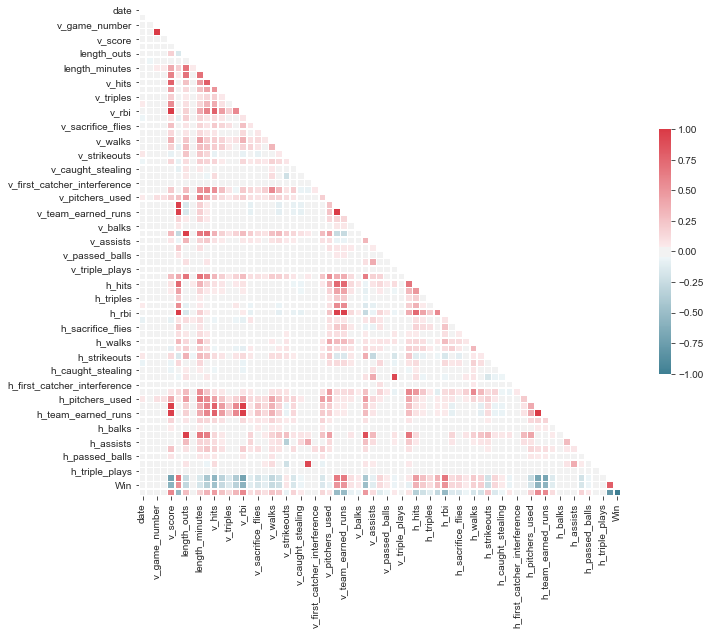

In [1152]:
# Compute the correlation matrix
corr = df_no_players.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [1153]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [1154]:
upper

,date,number_of_game,v_game_number,h_game_number,v_score,h_score,length_outs,attendance,length_minutes,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,Run_dif,Win,Lose
date,NaN,0.006915,0.011520,0.011426,0.017105,0.019674,0.007833,0.020137,0.029081,0.001181,0.003249,0.000951,0.006604,0.045838,0.018236,0.045876,0.001605,0.023289,0.005482,0.014563,0.059763,0.045523,0.022080,0.002929,0.018932,0.010349,0.044850,0.022439,0.022806,0.028960,0.003580,0.007746,0.022611,0.011573,0.014654,0.009093,0.006734,0.004872,0.006208,0.001776,0.001730,0.042693,0.020101,0.074567,0.001163,0.014681,0.000851,0.022859,0.059946,0.058205,0.004187,0.012607,0.013125,0.015536,0.056828,0.019137,0.018744,0.023737,0.003432,0.007402,0.026498,0.006904,0.015968,0.000591,0.014158,0.001351,0.000183,0.000183
number_of_game,NaN,NaN,0.022126,0.021797,0.003756,0.005220,0.008373,0.044624,0.000958,0.007688,0.002003,0.009467,0.001174,0.002543,0.001390,0.004080,0.006443,0.006946,0.022930,0.002535,0.010470,0.009151,0.006747,0.005680,0.010552,0.011852,0.000500,0.007136,0.007413,0.002408,0.007122,0.005633,0.010465,0.017212,0.026771,0.010685,0.003410,0.000138,0.000210,0.006323,0.006949,0.017489,0.007296,0.001540,0.000598,0.012925,0.009647,0.006641,0.009130,0.010822,0.003395,0.007108,0.005732,0.021643,0.016724,0.004343,0.004655,0.012497,0.015467,0.011104,0.013295,0.005583,0.013085,0.002263,0.007227,0.006439,0.008817,0.008817
v_game_number,NaN,NaN,NaN,0.999518,0.007531,0.007822,0.008437,0.022967,0.043371,0.001024,0.003342,0.016575,0.008322,0.002922,0.008278,0.005823,0.005270,0.007450,0.022459,0.001279,0.019570,0.013861,0.020609,0.003416,0.004524,0.004594,0.102064,0.005075,0.004068,0.000201,0.006793,0.010001,0.026151,0.009788,0.013467,0.001164,0.005964,0.000204,0.011349,0.009458,0.006695,0.003294,0.006755,0.005561,0.014834,0.012281,0.012088,0.001525,0.018990,0.010151,0.001830,0.002068,0.019197,0.005694,0.096808,0.003185,0.003398,0.022472,0.002381,0.005975,0.038014,0.005907,0.001699,0.005588,0.007610,0.011044,0.012106,0.012106
h_game_number,NaN,NaN,NaN,NaN,0.007790,0.007012,0.007988,0.022637,0.043274,0.001175,0.002984,0.016431,0.008376,0.002675,0.008482,0.006169,0.004904,0.007523,0.022857,0.000956,0.020442,0.013997,0.020709,0.002792,0.004777,0.004728,0.102301,0.004297,0.003303,0.000078,0.006908,0.009530,0.025641,0.009781,0.013506,0.000831,0.005826,0.000175,0.010796,0.009544,0.006702,0.002483,0.005919,0.005839,0.015091,0.012089,0.012479,0.001649,0.019956,0.010208,0.002192,0.002378,0.019599,0.005709,0.096678,0.003480,0.003705,0.022401,0.002440,0.005583,0.038845,0.006039,0.001119,0.006339,0.007879,0.010662,0.011789,0.011789
v_score,NaN,NaN,NaN,NaN,NaN,0.034816,0.182764,0.019917,0.393225,0.612514,0.783618,0.464350,0.193018,0.552280,0.987761,0.078311,0.272308,0.134373,0.359183,0.174856,0.074275,0.147758,0.015904,0.013037,0.025963,0.219479,0.204493,0.036155,0.036096,0.009407,0.016352,0.302565,0.066141,0.000729,0.010124,0.030447,0.016135,0.288398,0.082381,0.043120,0.000192,0.036525,0.037252,0.083679,0.010539,0.007940,0.006065,0.100129,0.128911,0.062105,0.059945,0.038290,0.011281,0.077091,0.398494,0.969056,0.966344,0.163830,0.041661,0.025861,0.029861,0.253251,0.073748,0.007807,0.002812,0.708569,0.584271,0.584271
...,...,...,...,...,...,...,...,...

In [1155]:
drop_col = [column for column in upper.columns if any(upper[column] > 0.90)]

In [1156]:
drop_col

['h_game_number',
 'v_rbi',
 'v_individual_earned_runs',
 'v_team_earned_runs',
 'v_putouts',
 'h_rbi',
 'h_grounded_into_double',
 'h_individual_earned_runs',
 'h_team_earned_runs',
 'h_putouts',
 'h_double_plays',
 'Lose']

In [1157]:
df_no_players = df_no_players.drop(columns = drop_col)

In [1158]:
df_no_players_features.isnull().describe()

,length_outs,length_minutes,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_wild_pitches,v_balks,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_wild_pitches,h_balks,h_assists,h_errors,h_passed_balls,h_triple_plays
count,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148


In [1159]:
df_no_players_features = df_no_players.drop(columns = ['date', 'number_of_game', 'day_of_week', 'v_name', 'v_league', 
                                                       'v_game_number', 'h_name', 'h_league','day_night','completion',
                                                       'forefeit', 'protest', 'park_id','attendance','Run_dif','v_score',
                                                       'h_score','Win'])

In [1160]:
target2 = df_no_players['Run_dif']

In [1161]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_no_players_features, target2,test_size=.25,random_state=30)

In [1162]:
scaler = StandardScaler()
scaler.fit(X_train2)
X_train2 =pd.DataFrame(data=scaler.transform(X_train2), columns= df_no_players_features.columns)
X_test2 =pd.DataFrame(data=scaler.transform(X_test2), columns = df_no_players_features.columns)

In [1163]:
lm2 = LinearRegression()
lm2 = lm2.fit(X_train2, y_train2)
y_train_pred2 = lm2.predict(X_train2)
train_rmse2 = np.sqrt(metrics.mean_squared_error(y_train2, y_train_pred2))
print('Training Root Mean Squared Error:' , train_rmse2)

Training Root Mean Squared Error: 0.6446399261611432


In [1164]:
y_test_pred2 = lm2.predict(X_test2)
test_rmse2 = np.sqrt(metrics.mean_squared_error(y_test2, y_test_pred2))
print('Test Root Mean Squared Error:' , test_rmse2)

Test Root Mean Squared Error: 0.6595052168109538


In [1165]:
lm_coef02 = pd.DataFrame(data=lm2.coef_).T
lm_coef02.columns = X_train2.columns
lm_coef02 = lm_coef02.T.sort_values(by=0, ascending = False).T

In [1166]:
lm_coef02.T.head()

,0
v_left_on_base,2.770854
h_at_bats,2.138560
h_walks,2.092106
h_hits,1.838666
h_hit_by_pitch,0.609289


In [1167]:
#df_no_players = pd.get_dummies(df_no_players, columns = ['park_id','day_night'], drop_first = True)

In [1168]:
#df_no_players_vis = pd.get_dummies(df_no_players_vis, columns = ['park_id','day_night'], drop_first = True)

In [1169]:
vis_df = df_no_players_vis.groupby(['v_name']).sum()

In [1170]:
home_df = df_no_players.groupby(['h_name']).sum()

In [1171]:
vis_df['Run_dif'] = vis_df['Run_dif'].apply(lambda x: -x)

In [1172]:
vis_df

,date,number_of_game,v_game_number,h_game_number,v_score,h_score,length_outs,attendance,length_minutes,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,Run_dif,Win,Lose
v_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ANA,8156974243,12,33362,33407,1932,1829,21614.0,11654350.0,75639.0,14171.0,3702.0,729.0,71.0,431.0,1832.0,86.0,137.0,136.0,1228.0,81.0,2986.0,228.0,100.0,323.0,2.0,2728.0,1644.0,1718.0,1718.0,153.0,11.0,10514.0,3675.0,241.0,25.0,323.0,0.0,13509.0,3538.0,676.0,57.0,463.0,1734.0,89.0,102.0,137.0,1290.0,90.0,2779.0,266.0,101.0,267.0,2.0,2786.0,1606.0,1778.0,1772.0,152.0,9.0,11100.0,4340.0,272.0,31.0,389.0,0.0,-103,198.0,207.0
ARI,8156973889,12,33422,33287,1651,1766,21997.0,13000694.0,75596.0,14298.0,3611.0,684.0,73.0,361.0,1561.0,129.0,103.0,95.0,1185.0,108.0,3189.0,272.0,109.0,330.0,7.0,2855.0,1668.0,1622.0,1621.0,137.0,18.0,10686.0,4040.0,228.0,21.0,353.0,0.0,13627.0,3527.0,726.0,73.0,418.0,1690.0,130.0,99.0,138.0,1269.0,110.0,3060.0,149.0,77.0,301.0,0.0,2811.0,1756.0,1526.0,1524.0,127.0,12.0,11311.0,4434.0,231.0,25.0,379.0,1.0,115,183.0,222.0
ATL,8136808866,12,32117,32048,1567,1683,21674.0,12228255.0,71908.0,13960.0,3424.0,665.0,52.0,353.0,1497.0,138.0,86.0,103.0,1225.0,104.0,3224.0,197.0,85.0,329.0,1.0,2798.0,1595.0,1584.0,1583.0,148.0,7.0,10526.0,4019.0,208.0,25.0,373.0,0.0,13349.0,3474.0,661.0,87.0,404.0,1618.0,147.0,89.0,134.0,1211.0,95.0,2815.0,266.0,76.0,311.0,0.0,2721.0,1664.0,1460.0,1459.0,135.0,12.0,11148.0,4278.0,200.0,35.0,390.0,1.0,116,185.0,219.0
BAL,8156974690,3,33211,33395,1725,1698,21852.0,12017148.0,73310.0,14205.0,3505.0,698.0,43.0,498.0,1671.0,73.0,94.0,110.0,1079.0,71.0,3385.0,117.0,70.0,300.0,1.0,2620.0,1562.0,1590.0,1589.0,120.0,8.0,10635.0,3875.0,208.0,21.0,358.0,0.0,13536.0,3451.0,752.0,58.0,427.0,1627.0,85.0,113.0,129.0,1256.0,91.0,2924.0,179.0,71.0,312.0,2.0,2788.0,1646.0,1633.0,1633.0,117.0,12.0,11217.0,3993.0,191.0,21.0,340.0,1.0,-27,202.0,203.0
BOS,8156975545,6,33970,33779,1775,1744,21855.0,13000852.0,76647.0,14230.0,3554.0,649.0,59.0,433.0,1691.0,57.0,120.0,144.0,1263.0,85.0,3239.0,242.0,75.0,328.0,5.0,2830.0,1552.0,1631.0,1627.0,131.0,14.0,10641.0,3783.0,197.0,44.0,343.0,0.0,13485.0,3388.0,642.0,61.0,437.0,1651.0,71.0,108.0,134.0,1281.0,51.0,3048.0,216.0,94.0,290.0,3.0,2697.0,1698.0,1642.0,1637.0,131.0,10.0,11214.0,3859.0,218.0,37.0,365.0,0.0,-31,197.0,208.0
CHA,8156970198,12,32193,32290,1625,1777,21783.0,11558459.0,72974.0,14174.0,3544.0,674.0,70.0,387.0,1561.0,59.0,107.0,144.0,991.0,58.0,3222.0,207.0,105.0,339.0,2.0,2635.0,1493.0,1629.0,1623.0,158.0,9.0,10566.0,3892.0,248.0,33.0,379.0,0.0,13535.0,3562.0,691.0,79.0,386.0,1705.0,93.0,106.0,160.0,1245.0,87.0,2943.0,240.0,75.0,313.0,1.0,2797.0,1622.0,1513.0,1510.0,131.0,6.0,11217.0,4242.0,219.0,28.0,394.0,0.0,152,168.0,237.0
CHN,8156972450,21,32647,32999,1636,1708,21735.0,13510055.0,74908.0,14096.0,3400.0,710.0,67.0,418.0,1553.0,102.0,80.0,155.0,1225.0,83.0,3512.0,202.0,96.0,270.0,4.0,2844.0,1615.0,1569.0,1569.0,152.0,9.0,10553.0,3963.0,259.0,22.0,320.0,0.0,13282.0,3256.0,674.0,84.0,371.0,1622.0,118.0,90.0,144.0,1241.0,104.0,3077.0,291.0,87.0,260.0,4.0,2618.0,1687.0,1487.0,1481.0,147.0,11.0,11182.0,3849.0,242.0,26.0,329.0,1.0,72,184.0,220.0
CIN,8156971494,7,32967,33011

In [1173]:
home_df

,date,number_of_game,v_game_number,v_score,h_score,length_outs,attendance,length_minutes,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_wild_pitches,v_balks,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_wild_pitches,h_balks,h_assists,h_errors,h_passed_balls,h_triple_plays,Run_dif,Win
h_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ANA,8156971054,3,32656,1639,1719,21753.0,15206117.0,74650.0,14066.0,3418.0,636.0,39.0,390.0,72.0,125.0,138.0,1194.0,79.0,3277.0,284.0,104.0,293.0,3.0,2766.0,1487.0,158.0,13.0,4226.0,251.0,26.0,405.0,0.0,13453.0,3497.0,640.0,62.0,407.0,97.0,111.0,128.0,1142.0,85.0,2755.0,194.0,74.0,6.0,2658.0,1694.0,141.0,13.0,3859.0,242.0,18.0,0.0,80,226.0
ARI,8156969853,6,32481,1962,1855,21839.0,10502603.0,75359.0,14399.0,3845.0,824.0,96.0,451.0,146.0,112.0,129.0,1205.0,95.0,3169.0,158.0,79.0,316.0,3.0,2845.0,1708.0,171.0,13.0,4134.0,234.0,44.0,348.0,0.0,13706.0,3625.0,758.0,142.0,396.0,127.0,116.0,115.0,1224.0,104.0,3123.0,238.0,91.0,4.0,2785.0,1743.0,169.0,10.0,4374.0,225.0,32.0,0.0,-107,191.0
ATL,8156975280,6,33724,1601,1616,21670.0,11345461.0,73612.0,13936.0,3407.0,641.0,60.0,336.0,150.0,104.0,118.0,1231.0,116.0,3325.0,227.0,82.0,326.0,4.0,2797.0,1632.0,137.0,20.0,3908.0,265.0,22.0,358.0,0.0,13308.0,3352.0,631.0,66.0,322.0,157.0,105.0,132.0,1329.0,99.0,3165.0,207.0,78.0,5.0,2894.0,1731.0,167.0,13.0,4000.0,239.0,36.0,0.0,15,219.0
BAL,8156971825,36,32973,1717,1894,21628.0,11417206.0,73095.0,14136.0,3576.0,696.0,41.0,467.0,49.0,85.0,138.0,1198.0,52.0,3077.0,162.0,95.0,354.0,6.0,2738.0,1558.0,139.0,7.0,3746.0,228.0,30.0,356.0,0.0,13580.0,3547.0,645.0,29.0,609.0,64.0,85.0,133.0,1104.0,60.0,2995.0,127.0,46.0,2.0,2603.0,1588.0,99.0,6.0,4199.0,195.0,20.0,0.0,177,242.0
BOS,8156968572,21,31870,1880,2072,21621.0,14668553.0,78723.0,14245.0,3713.0,797.0,79.0,417.0,60.0,118.0,153.0,1222.0,44.0,3215.0,265.0,84.0,339.0,1.0,2808.0,1664.0,173.0,9.0,3976.0,266.0,47.0,364.0,0.0,13886.0,3919.0,972.0,64.0,402.0,59.0,119.0,130.0,1317.0,91.0,2911.0,195.0,51.0,1.0,2930.0,1628.0,140.0,17.0,4082.0,247.0,59.0,0.0,192,211.0
CHA,8156976334,24,33948,1796,1689,21743.0,8887292.0,73962.0,14125.0,3560.0,651.0,58.0,469.0,72.0,115.0,167.0,1319.0,72.0,3333.0,223.0,83.0,354.0,6.0,2851.0,1523.0,163.0,15.0,3850.0,246.0,22.0,343.0,0.0,13533.0,3459.0,607.0,70.0,431.0,69.0,96.0,133.0,1157.0,60.0,3066.0,237.0,94.0,1.0,2712.0,1601.0,178.0,11.0,4039.0,245.0,44.0,3.0,-107,207.0
CHN,8156975296,15,33716,1611,1690,21773.0,14329093.0,74770.0,13909.0,3274.0,687.0,72.0,376.0,124.0,88.0,147.0,1278.0,74.0,3418.0,325.0,105.0,277.0,2.0,2752.0,1662.0,137.0,9.0,3691.0,222.0,28.0,330.0,0.0,13315.0,3269.0,687.0,78.0,418.0,114.0,87.0,179.0,1326.0,95.0,3287.0,181.0,92.0,0.0,2743.0,1769.0,161.0,6.0,4194.0,261.0,35.0,0.0,79,216.0
CIN,8156973954,20,33091,1702,1708,21857.0,11671917.0,75148.0,14108.0,3451.0,672.0,49.0,521.0,139.0,92.0,165.0,1269.0,82.0,3414.0,217.0,93.0,265.0,1.0,2846.0,1657.0,157.0,15.0,3799.0,242.0,30.0,304.0,0.0,13433.0,3380.0,658.0,62.0,438.0,161.0,99.0,127.0,1279.0,107.0,3158.0,262.0,89.0,3.0,2763.0,1639.0,127.0,18.0,3994.0,200.0,25.0,0.0,6,215.0
CLE,8136825012,21,33387,1741,1823,21670.0,7594487.0,74302.0,14146.0,3510.0,748.0,53.0,425.0,62.0,89.0,120.0,1203.0,68.0,3487.0,186.0,104.0,334.0,0.0,2725.0,1539.0,152.0,11.0,3770.0,236.0,32.0,360.0,0.0,13512.0,3569.0,783.0,42.0,383.0,89.0,130.0,110.0,1372.0,62.0,2897.0,292.0,78.0,1.0,2875.0,1723.0,144.0,7.0,4117.0,245.0,33.0,0.0,82,228.0


In [1284]:
def assign_rd_bins(rd):
    if rd < -200:
        return 1
    if rd >= -200 and rd <= -150:
        return 2
    if rd >= -149 and rd <= -100:
        return 3
    if rd >= -99 and rd <= -50:
        return 4
    if rd >= -49 and rd <= -1:
        return 5
    if rd >= 0 and rd <= 49:
        return 6
    if rd >= 50 and rd <= 99:
        return 7
    if rd >= 100 and rd <= 149:
        return 8
    if rd >= 150 and rd <= 199:
        return 9
    if rd >= 200:
        return 10
    
df_no_players['rd_bins'] = df_no_players['Run_dif'].apply(assign_rd_bins)

In [1285]:
df_no_players_vis['rd_bins'] = df_no_players_vis['Run_dif'].apply(assign_rd_bins)

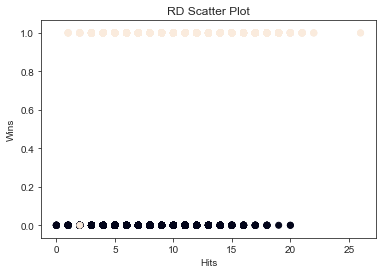

In [1299]:
plt.scatter(df_no_players['h_hits'], df_no_players['Win'], c=df_no_players['rd_bins'])
plt.title('RD Scatter Plot')
plt.xlabel('Hits')
plt.ylabel('Wins')

plt.show()

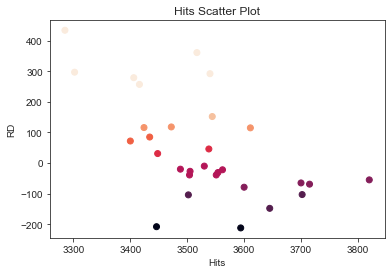

In [1177]:
plt.scatter(vis_df['v_hits'], vis_df['Run_dif'], c=vis_df['rd_bins'])
plt.title('Hits Scatter Plot')
plt.xlabel('Hits')
plt.ylabel('RD')

plt.show()

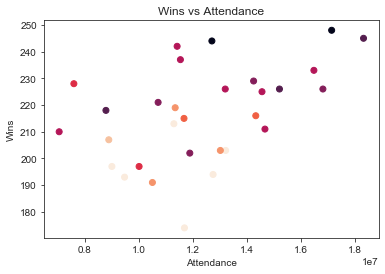

In [1301]:
plt.scatter(home_df['attendance'],home_df['Win'],c=vis_df['rd_bins'])
plt.title('Wins vs Attendance')
plt.xlabel('Attendance')
plt.ylabel('Wins')

plt.show()

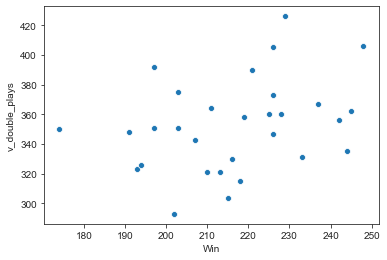

In [1311]:
sns.scatterplot(home_df['Win'],home_df['v_double_plays'])

## Modeling

In [1179]:
def fit_predict(model, x_train, y_train, x_test,y_test):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    print('Test Accuracy score: ', accuracy_score(y_test, predictions))

    print('Test F1 score: ', f1_score(y_test, predictions))
    
    print('Test ROC AUC score: ', roc_auc_score(y_test, predictions))

In [1207]:
home_wins_features = df_no_players.drop(columns = ['date','number_of_game','day_of_week','v_name','v_league',
                                                  'v_game_number','h_name','h_league','v_score','h_score','Run_dif',
                                                  'Win','completion','forefeit','protest','length_outs','length_minutes',
                                                  'h_triple_plays','v_triple_plays','v_first_catcher_interference',
                                                  'h_first_catcher_interference','day_night','park_id','attendance'])



In [1208]:
home_wins_features

,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_left_on_base,v_pitchers_used,v_wild_pitches,v_balks,v_assists,v_errors,v_passed_balls,v_double_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_left_on_base,h_pitchers_used,h_wild_pitches,h_balks,h_assists,h_errors,h_passed_balls
159759,39.0,9.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,1.0,4.0,3.0,0.0,0.0,7.0,1.0,0.0,0.0,39.0,6.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,10.0,2.0,1.0,7.0,6.0,0.0,0.0,19.0,1.0,0.0
159760,30.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,7.0,0.0,0.0,0.0,30.0,7.0,1.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,5.0,0.0,1.0,4.0,2.0,0.0,0.0,9.0,0.0,0.0
159761,37.0,13.0,3.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,5.0,1.0,1.0,0.0,10.0,4.0,0.0,0.0,10.0,0.0,0.0,1.0,30.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,3.0,5.0,0.0,0.0,12.0,0.0,0.0
159762,56.0,10.0,3.0,0.0,2.0,0.0,1.0,1.0,7.0,1.0,16.0,0.0,0.0,3.0,10.0,8.0,0.0,0.0,20.0,1.0,0.0,3.0,49.0,7.0,2.0,0.0,1.0,1.0,0.0,1.0,11.0,0.0,12.0,0.0,1.0,10.0,6.0,1.0,0.0,22.0,0.0,0.0
159763,32.0,5.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,8.0,1.0,0.0,0.0,5.0,5.0,0.0,0.0,7.0,0.0,0.0,3.0,31.0,10.0,2.0,1.0,0.0,0.0,1.0,1.0,4.0,1.0,4.0,0.0,0.0,9.0,2.0,0.0,0.0,6.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171902,39.0,10.0,4.0,1.0,2.0,0.0,0.0,1.0,4.0,0.0,12.0,2.0,1.0,0.0,8.0,7.0,1.0,0.0,12.0,1.0,0.0,0.0,41.0,13.0,4.0,0.0,1.0,1.0,0.0,1.0,3.0,0.0,11.0,0.0,1.0,12.0,5.0,0.0,0.0,13.0,0.0,0.0
171903,33.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,9.0,1.0,1.0,1.0,6.0,6.0,0.0,0.0,12.0,3.0,1.0,2.0,33.0,10.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,7.0,5.0,0.0,0.0,7.0,0.0,0.0
171904,30.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,1.0,4.0,7.0,0.0,0.0,5.0,1.0,0.0,0.0,39.0,16.0,3.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,11.0,2.0,1.0,12.0,2.0,0.0,0.0,7.0,0.0,0.0
171905,35.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,11.0,0.0,1.0,0.0,8.0,6.0,0.0,0.0,2.0,2.0,0.0,0.0,36.0,12.0,2.0,0.0,1.0,0.0,2.0,0.0,4.0,0.0,5.0,0.0,0.0,8.0,3.0,0.0,0.0,7.0,0.0,0.0


In [1209]:
pd.set_option('display.max_columns', None)

In [1210]:
home_wins_features.isnull().describe()

,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_left_on_base,v_pitchers_used,v_wild_pitches,v_balks,v_assists,v_errors,v_passed_balls,v_double_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_left_on_base,h_pitchers_used,h_wild_pitches,h_balks,h_assists,h_errors,h_passed_balls
count,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148


In [1211]:
df_no_players.isnull().describe()

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_wild_pitches,v_balks,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_wild_pitches,h_balks,h_assists,h_errors,h_passed_balls,h_triple_plays,Run_dif,Win
count,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148
unique,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12136,12148,12140,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148,12148


In [1212]:
#df_no_players['attendance'] = df_no_players['attendance'].fillna(df_no_players['attendance'].mean())

In [1213]:
df_no_players['Win'] = df_no_players['Win'].fillna(0)

In [1214]:
#home_wins_features['attendance'] = home_wins_features['attendance'].fillna(home_wins_features['attendance'].mean())

In [1215]:
target_wins = df_no_players['Win']

In [1216]:
X_train, X_test, y_train, y_test = train_test_split(home_wins_features, target_wins,test_size=.25,random_state=10)

## Dummy Classifier

In [1217]:
dummy = DummyClassifier().fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

print('Test Accuracy score: ', accuracy_score(y_test, dummy_pred))

print('Test F1 score: ', f1_score(y_test, dummy_pred))

Test Accuracy score:  0.5031280869278894
Test F1 score:  0.5323830182832352


## Logistic Regression Balanced Model

In [1218]:
lr_balanced = LogisticRegression(solver='liblinear', class_weight='balanced')

In [1219]:
fit_predict(lr_balanced,X_train, y_train, X_test, y_test)

Test Accuracy score:  0.9641093184063221
Test F1 score:  0.9662851840395918
Test ROC AUC score:  0.9638628445236298


In [1220]:
lr_balanced_pred = lr_balanced.predict(X_test)

Confusion Matrix, without normalization
[[1366   57]
 [  52 1562]]


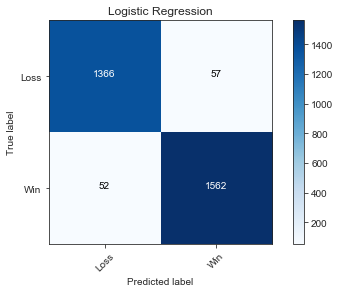

In [1348]:
cm = confusion_matrix(y_test,lr_balanced_pred)
classes = ['Loss', 'Win']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Logistic Regression',
                          cmap=plt.cm.Blues)

In [1222]:
lr_coef01 = pd.DataFrame(data=lr_balanced.coef_).T
lr_coef01 = lr_coef01.set_index(X_train.columns)
lr_coef01 = lr_coef01.sort_values(by = 0, ascending = False).T

In [1224]:
lr_coef01.T.head(50)

,0
h_hits,2.411133
h_walks,2.104806
v_grounded_into_double,2.018175
v_caught_stealing,1.998924
h_hit_by_pitch,1.968868
v_left_on_base,1.935854
v_errors,1.710381
v_balks,0.776571
h_intentional walks,0.715979
h_homeruns,0.612712


## DTC Gridsearch

In [1225]:
dtc_param_grid = { 
    'min_samples_leaf': [1,10,20,30],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,10,15],
    'min_samples_split': [2,10,20,40],}

In [1246]:
dtc_gs = GridSearchCV(DecisionTreeClassifier(), dtc_param_grid, scoring = 'accuracy', verbose=1, cv=5)

In [1247]:
dtc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   14.6s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 10, 20, 30],
                         'min_samples_split': [2, 10, 20, 40]},
             scoring='accuracy', verbose=1)

In [1248]:
print(dtc_gs.best_score_)
print(dtc_gs.best_params_)
print(dtc_gs.best_estimator_)

0.8572047137653822
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 10}
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10,
                       min_samples_split=10)


In [1249]:
fit_predict(dtc_gs.best_estimator_,X_train, y_train,X_test,y_test)

Test Accuracy score:  0.8521567336187027
Test F1 score:  0.8575959403742467
Test ROC AUC score:  0.8531289376772635


In [1250]:
dtc_gs_pred = dtc_gs.best_estimator_.predict(X_test)

Confusion Matrix, without normalization
[[1236  187]
 [ 262 1352]]


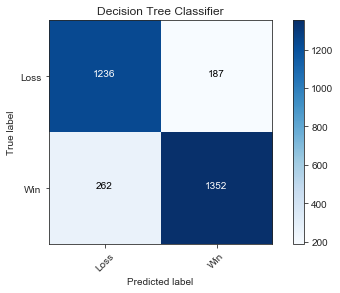

In [1251]:
cm = confusion_matrix(y_test,dtc_gs_pred)
classes = ['Loss', 'Win']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Decision Tree Classifier',
                          cmap=plt.cm.Blues)

In [1252]:
dtc_features = dict(zip(X_train.columns, dtc_gs.best_estimator_.feature_importances_))

In [1253]:
pd.DataFrame.from_dict(dtc_features, orient = 'index').sort_values(by = 0, ascending = False).head(15)

,0
h_hits,0.326162
v_hits,0.211924
h_at_bats,0.192791
v_double_plays,0.037515
h_homeruns,0.035282
v_assists,0.023975
v_errors,0.021420
v_homeruns,0.019574
h_intentional walks,0.019228
v_walks,0.016217


## RFC Gridsearch

In [1254]:
rfc_param_grid = { 
    'n_estimators': [100,200],
    'max_depth': [5,10,15],
    'max_features': [1.0,4,8],
    'min_samples_split': [2,30,50],
}

In [1255]:
rfc_gs = GridSearchCV(RandomForestClassifier(), rfc_param_grid, scoring = 'accuracy',n_jobs=-1, verbose=1, cv=5)

In [1256]:
rfc_gs.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.2min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': [1.0, 4, 8],
                         'min_samples_split': [2, 30, 50],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [1257]:
print(rfc_gs.best_score_)
print(rfc_gs.best_params_)
print(rfc_gs.best_estimator_)

0.9026440415883638
{'max_depth': 15, 'max_features': 1.0, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestClassifier(max_depth=15, max_features=1.0, n_estimators=200)


In [1258]:
fit_predict(rfc_gs.best_estimator_,X_train, y_train,X_test,y_test)

Test Accuracy score:  0.9028646690813302
Test F1 score:  0.9082996580665217
Test ROC AUC score:  0.9027076415865741


In [1260]:
rfc_gs_pred = rfc_gs.best_estimator_.predict(X_test)

Confusion Matrix, without normalization
[[1281  142]
 [ 153 1461]]


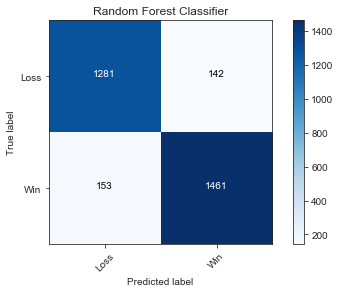

In [1261]:
cm = confusion_matrix(y_test,rfc_gs_pred)
classes = ['Loss', 'Win']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Random Forest Classifier',
                          cmap=plt.cm.Blues)

In [1262]:
rfc_features = dict(zip(X_train.columns, rfc_gs.best_estimator_.feature_importances_))

In [1264]:
pd.DataFrame.from_dict(rfc_features, orient = 'index').sort_values(by = 0, ascending = False).head(15)

,0
h_hits,0.238023
v_hits,0.198406
h_at_bats,0.166619
v_double_plays,0.030680
h_homeruns,0.028867
v_homeruns,0.022231
h_intentional walks,0.021847
v_walks,0.021500
v_assists,0.021360
v_left_on_base,0.017965


## XGBoost

In [1271]:
xgb_est = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': [100,300,500],
              'learning_rate': [0.1,0.05,0.01],
              'max_depth': [3, 5, 7],
              'colsample_bytree': [0.5,0.4],
              'min_child_weight': [1, 2, 3]
             }

In [1272]:
xgb_gs = GridSearchCV(
    estimator = xgb_est,
    param_grid = param_dist, 
    scoring='accuracy',
    #n_jobs=-1,
    verbose=1,
    iid=False, 
    cv=5)

In [1273]:
xgb_gs.fit(X_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:  9.0min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,
  

In [1274]:
print(xgb_gs.best_score_)
print(xgb_gs.best_params_)
print(xgb_gs.best_estimator_)

0.9463288038618627
{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 500}
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)


In [1275]:
fit_predict(xgb_gs.best_estimator_,X_train, y_train,X_test,y_test)

Test Accuracy score:  0.9522555153111624
Test F1 score:  0.9549829245575909
Test ROC AUC score:  0.9522114561535964


In [1277]:
xgb_gs_pred = xgb_gs.best_estimator_.predict(X_test)

Confusion Matrix, without normalization
[[1354   69]
 [  76 1538]]


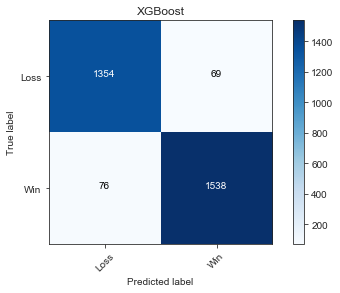

In [1278]:
cm = confusion_matrix(y_test,xgb_gs_pred)
classes = ['Loss', 'Win']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='XGBoost',
                          cmap=plt.cm.Blues)

In [1280]:
xgb_features = xgb_gs.best_estimator_.get_booster().get_fscore()

In [1281]:
pd.DataFrame.from_dict(xgb_features, orient = 'index').sort_values(by = 0, ascending = False).head(15)

,0
h_hits,961
h_at_bats,813
v_hits,695
v_left_on_base,608
v_walks,545
h_left_on_base,509
h_walks,496
v_assists,421
v_at_bats,413
v_double_plays,398


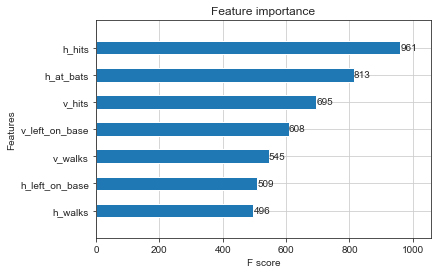

In [1283]:
plot_importance(xgb_gs.best_estimator_, max_num_features=7,height = 0.5)

In [477]:
df2 = pd.read_csv('file:///Users/chrisfiorentine/Downloads/datasets_3217_5288_baseball.csv')

In [478]:
df2

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


In [492]:
df2 = df2[df2['Year'] > 1998]

In [493]:
df2

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,SFG,NL,1999,872,831,86,0.356,0.434,0.271,0,NaN,NaN,162,0.345,0.423
416,STL,NL,1999,809,838,75,0.338,0.426,0.262,0,NaN,NaN,161,0.355,0.427
417,TBD,AL,1999,772,913,69,0.343,0.411,0.274,0,NaN,NaN,162,0.371,0.448
418,TEX,AL,1999,945,859,95,0.361,0.479,0.293,1,5.0,4.0,162,0.346,0.459


In [534]:
df2_features = df2.drop(columns = ['League', 'RankSeason','G','RankPlayoffs','Team','Playoffs','W','Year','RS','RA'])

In [535]:
df2_features

,OBP,SLG,BA,OOBP,OSLG
0,0.328,0.418,0.259,0.317,0.415
1,0.320,0.389,0.247,0.306,0.378
2,0.311,0.417,0.247,0.315,0.403
3,0.315,0.415,0.260,0.331,0.428
4,0.302,0.378,0.240,0.335,0.424
...,...,...,...,...,...
415,0.356,0.434,0.271,0.345,0.423
416,0.338,0.426,0.262,0.355,0.427
417,0.343,0.411,0.274,0.371,0.448
418,0.361,0.479,0.293,0.346,0.459


In [536]:
target3 = df2['W']

In [537]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df2_features, target3,test_size=.25,random_state=30)

In [538]:
scaler3 = StandardScaler()
scaler3.fit(X_train3)
X_train3 =pd.DataFrame(data=scaler3.transform(X_train3), columns= df2_features.columns)
X_test3 =pd.DataFrame(data=scaler3.transform(X_test3), columns = df2_features.columns)

In [539]:
lm3 = LinearRegression()
lm3 = lm3.fit(X_train3, y_train3)
y_train_pred3 = lm3.predict(X_train3)
train_rmse3 = np.sqrt(metrics.mean_squared_error(y_train3, y_train_pred3))
print('Training Root Mean Squared Error:' , train_rmse3)

Training Root Mean Squared Error: 4.6422208255638555


In [540]:
y_test_pred3 = lm3.predict(X_test3)
test_rmse3 = np.sqrt(metrics.mean_squared_error(y_test3, y_test_pred3))
print('Test Root Mean Squared Error:' , test_rmse3)

Test Root Mean Squared Error: 4.961681465018938


In [541]:
target4 = df2['Playoffs']

In [542]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(df2_features, target4,test_size=.25,random_state=25)

In [543]:
scaler4 = StandardScaler()
scaler4.fit(X_train4)
X_train4 =pd.DataFrame(data=scaler4.transform(X_train4), columns= df2_features.columns)
X_test4 =pd.DataFrame(data=scaler4.transform(X_test4), columns = df2_features.columns)

In [544]:
lr = LogisticRegression(solver='liblinear',class_weight='balanced')

lr.fit(X_train4, y_train4)

y_pred_test4 = lr.predict(X_test4)


print('Test Accuracy score: ', accuracy_score(y_test4, y_pred_test4))


print('Test F1 score: ', f1_score(y_test4, y_pred_test4))

Test Accuracy score:  0.8095238095238095
Test F1 score:  0.7297297297297297


In [545]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[58 17]
 [ 3 27]]


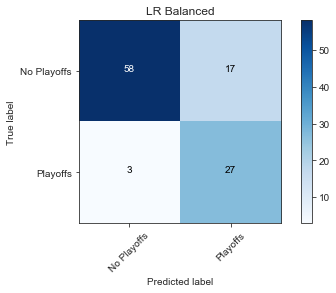

In [546]:
cm = confusion_matrix(y_test4,y_pred_test4)
classes = ['No Playoffs', 'Playoffs']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='LR Balanced',
                          cmap=plt.cm.Blues)

In [1349]:
lr_coef02 = pd.DataFrame(data=lr.coef_).T
lr_coef02 = lr_coef02.set_index(X_train4.columns)
lr_coef02 = lr_coef02.sort_values(by = 0, ascending = False).T

In [1350]:
lr_coef01.T.head(50)

,0
h_hits,2.411133
h_walks,2.104806
v_grounded_into_double,2.018175
v_caught_stealing,1.998924
h_hit_by_pitch,1.968868
v_left_on_base,1.935854
v_errors,1.710381
v_balks,0.776571
h_intentional walks,0.715979
h_homeruns,0.612712


(array([ 1.,  8., 23., 81., 77., 82., 87., 53.,  7.,  1.]),
 array([ 43. ,  50.3,  57.6,  64.9,  72.2,  79.5,  86.8,  94.1, 101.4,
        108.7, 116. ]),
 <a list of 10 Patch objects>)

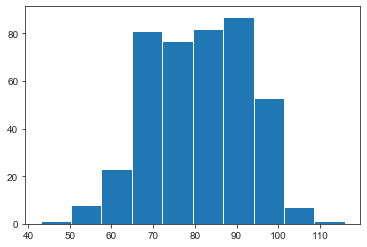

In [547]:
plt.hist(df2['W'])

In [551]:
kmeans_model = KMeans(n_clusters=2, random_state=1)
groups = kmeans_model.fit_transform(df2_features)
labels = kmeans_model.labels_

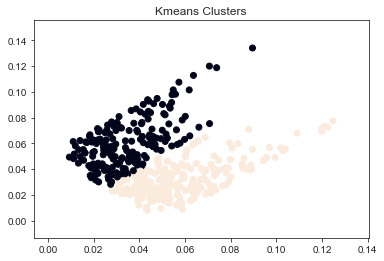

In [552]:
plt.scatter(groups[:,0], groups[:,1], c=labels)
plt.title('Kmeans Clusters')

plt.show()

In [ ]:
df2_features = df2.drop(columns = ['League', 'RankSeason','G','RankPlayoffs','Playoffs'])

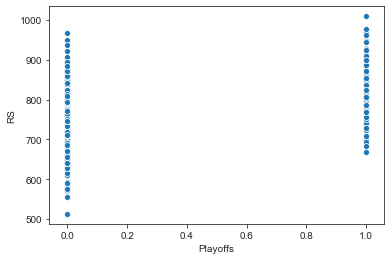

In [1313]:
sns.scatterplot(df2['Playoffs'], df2['RS'])

In [1323]:
playoffs_df = df2.loc[df2['Playoffs'] == 1]

In [1324]:
playoffs_df['RS'].describe()

count     114.000000
mean      812.850877
std        74.074494
min       669.000000
25%       761.250000
50%       804.500000
75%       865.250000
max      1009.000000
Name: RS, dtype: float64

In [1325]:
playoffs_df['RA'].describe()

count    114.000000
mean     697.438596
std       63.508627
min      529.000000
25%      650.250000
50%      689.500000
75%      733.500000
max      860.000000
Name: RA, dtype: float64

In [1326]:
playoffs_df.describe()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.0,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,2005.614035,812.850877,697.438596,94.482456,0.341184,0.434061,0.269044,1.0,3.649123,3.157895,161.973684,0.321412,0.403833,115.412281
std,4.103762,74.074494,63.508627,4.892169,0.013191,0.020652,0.010876,0.0,1.838538,1.077353,0.363380,0.011056,0.019147,53.290789
min,1999.000000,669.000000,529.000000,82.000000,0.310000,0.389000,0.238000,1.0,1.000000,1.000000,161.000000,0.296000,0.361000,-42.000000
25%,2002.000000,761.250000,650.250000,91.000000,0.332000,0.420250,0.262250,1.0,2.000000,3.000000,162.000000,0.314000,0.392000,81.250000
50%,2006.000000,804.500000,689.500000,95.000000,0.341000,0.433500,0.269000,1.0,4.000000,4.000000,162.000000,0.321000,0.403500,109.500000
75%,2009.000000,865.250000,733.500000,97.000000,0.350000,0.448000,0.277000,1.0,5.000000,4.000000,162.000000,0.328000,0.417000,147.750000
max,2012.000000,1009.000000,860.000000,116.000000,0.373000,0.491000,0.293000,1.0,7.000000,5.000000,163.000000,0.348000,0.459000,300.000000


In [1327]:
df2['RD'] = df2['RS'] - df2['RA']

In [1322]:
df2

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,SFG,NL,1999,872,831,86,0.356,0.434,0.271,0,NaN,NaN,162,0.345,0.423,41
416,STL,NL,1999,809,838,75,0.338,0.426,0.262,0,NaN,NaN,161,0.355,0.427,-29
417,TBD,AL,1999,772,913,69,0.343,0.411,0.274,0,NaN,NaN,162,0.371,0.448,-141
418,TEX,AL,1999,945,859,95,0.361,0.479,0.293,1,5.0,4.0,162,0.346,0.459,86


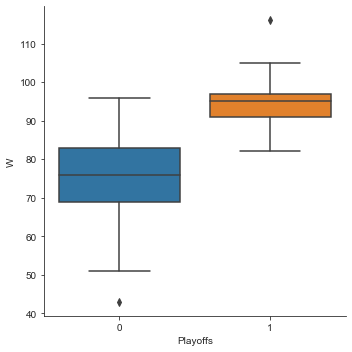

In [1341]:
sns.catplot(data = df2, x = 'Playoffs', y = 'W', kind = 'box')

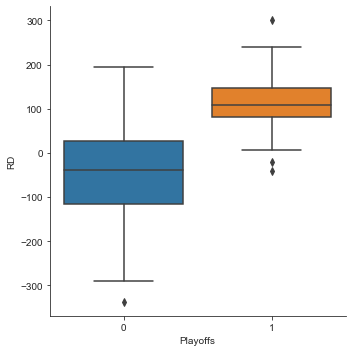

In [1342]:
sns.catplot(data = df2, x = 'Playoffs', y = 'RD', kind = 'box')

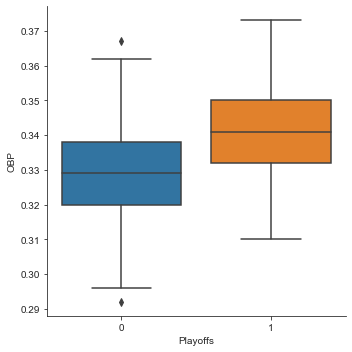

In [1347]:
sns.catplot(data = df2, x = 'Playoffs', y = 'OBP', kind = 'box')